In [18]:
import os
import h5py
import corner
import numpy as np
import pandas as pd
import vallog as vl
import matplotlib.pyplot as plt

In [3]:
msg = vl.Logger()

In [4]:
input_file: str = input("path/to/hdf5/file: ")
if input_file == "":
    input_file = "../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "hdf5" not in input_file:
    raise ValueError(f"File {input_file} is not a hdf5 file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        ../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5


In [16]:
hdf5 = h5py.File(input_file, "r")['MSSM']
hdf5_df = pd.DataFrame({key: hdf5[key][:] for key in hdf5.keys()})
for key in hdf5.keys():
    print(key)

input_parameters = ["Ad_3", "Au_3", "M2", "TanBeta", "mHd2", "mHu2", "mf2"]
parameter_df = hdf5_df[["#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::" + parameter for parameter in input_parameters]]
parameter_df.columns = input_parameters

mask = hdf5_df["LogLike_isvalid"] == 1
valid_models = parameter_df[mask]



msg.log(f"number of generated models: {hdf5_df.shape[0]}", vl.info)
msg.log(f"number of valid models: {valid_models.shape[0]}", vl.info)


#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2_isvalid
#MSSM7atQ_parameters

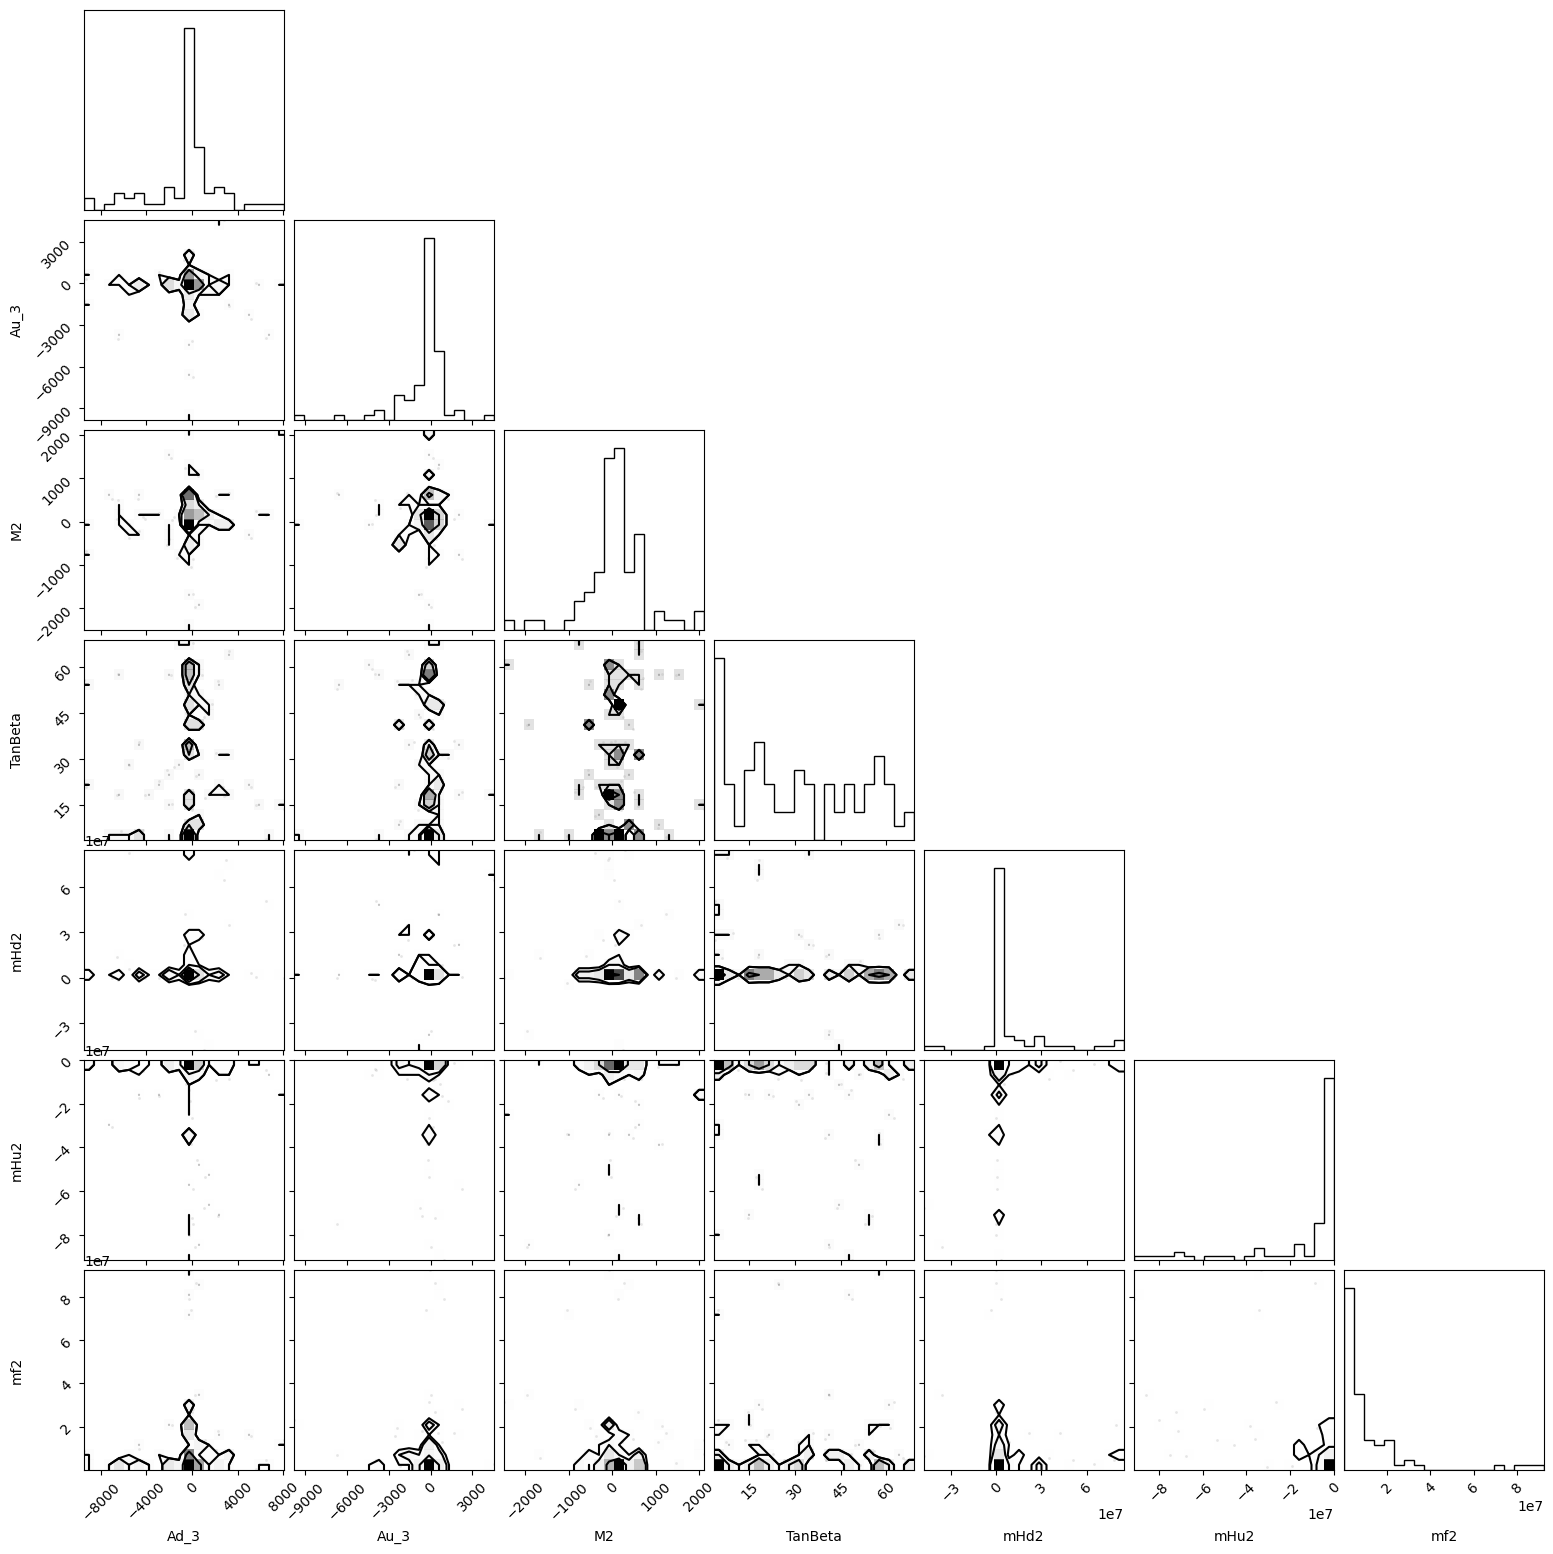

In [20]:
corner_fig = corner.corner(valid_models, labels=parameter_df.columns)